## 기초데이터과학 (01분반) 

## Programming assignment 03

### 1. 미국의 아기 이름 데이터로 아래 문제에 맞게 코드를 작성하세요.

In [ ]:
!pip install pandas

In [1]:
import pandas as pd

# 주어진 데이터 생성
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

#### 1-1. 연도별 출생 인구 수 총합을 구하세요.

In [2]:
import pandas as pd
# df에서 연도별 인구 수 총합을 계산하여 새로운 dataframe으로 저장
# 이때, pandas.DataFrame.reset_index 함수를 활용하여 행 index를 초기화 할 것(행 index를 연도로 저장하지 말 것)
df
total_population = df.groupby('Year')['Count'].sum().reset_index()
# 저장한 dataframe의 column을 'Year'와 'Total_Count'로 명명
total_population.columns = ['Year', 'Total_Count']

# dataframe 출력
print(total_population)


    Year  Total_Count
0   2004      3293984
1   2005      3305315
2   2006      3387737
3   2007      3412417
4   2008      3340318
5   2009      3232116
6   2010      3116548
7   2011      3079145
8   2012      3073858
9   2013      3066443
10  2014      3113611


#### 1-2. 연도별 출생 인구 수를 성별로 구분하여 총합을 구하세요.

In [6]:
import pandas as pd
# df에서 연도별 인구 수 성별 구분하여 계산하여 새로운 dataframe으로 저장
# 성별을 열로 정렬하기 위해 pandas.DataFrame.unstack 함수 참조

population_by_gender = df.groupby(['Year', 'Gender'])['Count'].sum()

# F M 으로 나누기 위해서 unstack을 사용
population_by_gender_df = population_by_gender.unstack()

# Year을 index로 사용
population_by_gender_df.index.name = 'Year'

print(population_by_gender_df)

Gender        F        M
Year                    
2004    1523496  1770488
2005    1528165  1777150
2006    1564886  1822851
2007    1576648  1835769
2008    1544411  1795907
2009    1493172  1738944
2010    1439346  1677202
2011    1422539  1656606
2012    1422020  1651838
2013    1419351  1647092
2014    1446259  1667352


#### 1-3. 연도별 출생 성별 비율을 구하세요.

In [15]:
# 1-2에서 만든 dataframe 변수의 'Female_Ratio'와 'Male_Ratio' column(변수)를 추가 (성별 비율 계산하여 입력)
# Assuming 'population_by_gender_df' is your DataFrame from previous steps
population_by_gender_df['Total'] = population_by_gender_df['F'] + population_by_gender_df['M']

population_by_gender_df['Female_Ratio'] = population_by_gender_df['F'] / population_by_gender_df['Total']
population_by_gender_df['Male_Ratio'] = population_by_gender_df['M'] / population_by_gender_df['Total']

# dataframe의 column 'Female_Ratio'와 'Male_Ratio' 출력
print(population_by_gender_df[['Female_Ratio', 'Male_Ratio']])


Gender  Female_Ratio  Male_Ratio
Year                            
2004        0.462509    0.537491
2005        0.462336    0.537664
2006        0.461927    0.538073
2007        0.462033    0.537967
2008        0.462354    0.537646
2009        0.461980    0.538020
2010        0.461840    0.538160
2011        0.461992    0.538008
2012        0.462617    0.537383
2013        0.462866    0.537134
2014        0.464496    0.535504


### 2. 타이타닉 승객 정보 데이터로 아래 문제에 맞게 코드를 작성하세요.

In [9]:
import pandas as pd

# 주어진 데이터 생성
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 2-1. 위에서 생성한 DataFrame 객체의 앞 3개 행을 출력하시오.

In [8]:
# Data 형태 확인
# DataFrame의 앞 3개 행을 출력
print("앞 3개 행:")

print(df.head(3))


앞 3개 행:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


#### 2-2. 각 Pclass에 대해 나이('Age')와 요금('Fare')의 평균과 표준편차를 구하세요.

In [93]:
# 각 Pclass에 대해 'Age'와 'Fare'의 평균과 표준편차를 계산하여 새로운 dataframe으로 저장
pclass_stats = df.groupby('Pclass')[['Age', 'Fare']].agg(['mean', 'std'])


# dataframe 출력
print(pclass_stats)

# # Group by 'Pclass' and calculate mean and std for 'Age' and 'Fare'
# pclass_stats = df.groupby('Pclass')[['Age', 'Fare']].agg(['mean', 'std']).reset_index()

# # Flatten the multi-level columns
# pclass_stats.columns = ['Pclass', 'Age mean', 'std', 'Fare\nMean', 'std']



              Age                  Fare           
             mean        std       mean        std
Pclass                                            
1       38.233441  14.802856  84.154687  78.380373
2       29.877630  14.001077  20.662183  13.417399
3       25.140620  12.495398  13.675550  11.778142


#### 2-3. 승객의 탑승 클래스('Pclass')에 따라 생존률('Survived')을 구하세요.

In [114]:
# df에서 승객의 탑승 클래스별 생존률을 계산하여 새로운 dataframe으로 저장
import pandas as pd

# Group by 'Pclass' and calculate the survival rate
survival_rate = df.groupby('Pclass')['Survived'].mean()

# dataframe 출력
print(survival_rate)

# # Group by 'Pclass' and calculate the survival rate
# survival_rate = df.groupby('Pclass')['Survived'].mean().reset_index()

# # Rename the columns for clarity
# survival_rate.columns = ['Pclass', 'Survival_Rate']




Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


#### 2-4.생존자와 사망자의 데이터를 분리하고, 다시 수직으로 결합하세요.

In [115]:

# 'Survived'가 1인 데이터와 0인 데이터를 분리해서 각각 새로운 dataframe으로 저장
survived_df = df[df['Survived'] == 1]
not_survived_df = df[df['Survived'] == 0]

# 저장한 두 dataframe을 결합하여 새로운 dataframe 객체로 저장
combined_df = pd.concat([survived_df, not_survived_df])

# 위에서 결합한 dataframe의 'PassengerId', 'Survived', 'Pclass', 'Fare' column 출력
print(combined_df[['PassengerId', 'Survived', 'Pclass', 'Fare']])


     PassengerId  Survived  Pclass     Fare
1              2         1       1  71.2833
2              3         1       3   7.9250
3              4         1       1  53.1000
8              9         1       3  11.1333
9             10         1       2  30.0708
..           ...       ...     ...      ...
884          885         0       3   7.0500
885          886         0       3  29.1250
886          887         0       2  13.0000
888          889         0       3  23.4500
890          891         0       3   7.7500

[891 rows x 4 columns]


#### 2-5. 각 탑승 클래스('Pclass')와 생존여부('Survived')에 따라 동반 가족 수(형제자매와 배우자 수 'SibSp' + 부모와 자녀 수 'Parch')의 평균과 최대값을 구하세요.

In [116]:
import pandas as pd

# 각 'Pclass'와 'Survived'에 따라 동반 가족 수('SibSp' + 'Parch')의 평균과 최대값
family_stats = df.groupby(['Pclass', 'Survived'])[['SibSp', 'Parch']].agg(['mean', 'max'])

# dataframe 출력
print(family_stats)

                    SibSp         Parch    
                     mean max      mean max
Pclass Survived                            
1      0         0.287500   3  0.300000   4
       1         0.492647   3  0.389706   2
2      0         0.319588   2  0.144330   2
       1         0.494253   3  0.643678   3
3      0         0.672043   8  0.384409   6
       1         0.436975   4  0.420168   5


### 3. 타이타닉 승객 정보 데이터로 아래 문제에 맞게 코드를 작성하세요.

In [10]:
import pandas as pd

# 주어진 데이터 생성
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

#### 3-1. 나이('Age'), 객실 번호('Cabin'), 탑승 항구('Embarked') colume의 결측치 개수를 확인하세요.

In [11]:
# 나이 결측치 개수 출력
print("나이 결측치 개수:", df['Age'].isna().sum())

# 객실 번호 결측치 개수 출력
print("객실 번호 결측치 개수:", df['Cabin'].isna().sum())

# 탑승 항구 결측치 개수 출력
print("탑승 항구 결측치 개수:", df['Embarked'].isna().sum())


나이 결측치 개수: 177
객실 번호 결측치 개수: 687
탑승 항구 결측치 개수: 2


#### 3-2. 'Age' column에 결측치가 있는 행을 제거하세요.

In [12]:
# 'Age' column에 결측치가 있는 행을을 제거하여 새로운 dataframe으로 저장
df_no_missing_age = df.dropna(subset=['Age'])

# dataframe 'Age' column 출력
print(df_no_missing_age['Age'])


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64


#### 3-3. 'Age' column의 결측치를 0으로 대체하세요.

In [13]:
# df를 복사하여 새로운 dataframe으로 저장
df_copy1 = df.copy()

# 복사한 dataframe의 'Age'열 결측치를 0으로 대체
df_copy1['Age'].fillna(0, inplace=True)

# dataframe 'Age' column 출력
print(df_copy1['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


C:\Users\didsu\AppData\Local\Temp\ipykernel_20828\1129448310.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy1['Age'].fillna(0, inplace=True)


#### 3-4. 'Age' column의 결측치를 이전 행의 값으로 채우세요.

In [14]:
# df를 복사하여 새로운 dataframe으로 저장
df_copy2 = df.copy()


# 복사한 dataframe의 'Age'열 결측치를 이전 행의 값으로 대체
#pandas.DataFrame.ffill 함수 활용
df_copy2['Age'].ffill(inplace=True)

# dataframe 'Age' column 출력
print(df_copy2['Age'])


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


C:\Users\didsu\AppData\Local\Temp\ipykernel_20828\1858024931.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy2['Age'].ffill(inplace=True)


#### 3-5. 'Age' column의 결측치를 평균값으로 대체하세요.

In [43]:
# df를 복사하여 새로운 dataframe으로 저장
df_copy3 = df.copy()

# 복사한 dataframe의 'Age'열 결측치를 평균값으로 대체
mean_age = df['Age'].mean()
df_copy3['Age'].fillna(mean_age, inplace=True)

# dataframe 'Age' column 출력
print(df_copy3['Age'])


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


C:\Users\didsu\AppData\Local\Temp\ipykernel_16136\495543222.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy3['Age'].fillna(mean_age, inplace=True)


#### 3-6. 'Age' column의 결측치를 선형 보간법으로 채우세요.

In [103]:
# df를 복사하여 새로운 dataframe으로 저장
df_copy4 = df.copy()

# 복사한 dataframe의 'Age'열 결측치를 선형 보간법으로 대체
# pandas.DataFrame.interpolate 함수 활용
df_copy4['Age'].interpolate(method='linear', inplace=True)

# dataframe 'Age' column 출력
print(df_copy4['Age'])



0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


C:\Users\didsu\AppData\Local\Temp\ipykernel_16136\1352013131.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy4['Age'].interpolate(method='linear', inplace=True)


#### 3-7. 3-2부터 3-6까지 결측치를 처리한 각 dataframe에서 'Age' column의 평균과 중앙값을 출력하세요.

In [104]:
# 각 dataframe 'Age' column 평균 출력
print("평균(결측값 제거):", df_no_missing_age['Age'].mean())
print("평균(결측값 0):", df_copy1['Age'].mean())
print("평균(결측값 이전값):", df_copy2['Age'].mean())
print("평균(결측값 평균):", df_copy3['Age'].mean())
print("평균(결측값 선형 보간):", df_copy4['Age'].mean())

# 각 dataframe 'Age' column 중앙값 출력
print("중앙값(결측값 제거):", df_no_missing_age['Age'].median())
print("중앙값(결측값 0):", df_copy1['Age'].median())
print("중앙값(결측값 이전값):", df_copy2['Age'].median())
print("중앙값(결측값 평균):", df_copy3['Age'].median())
print("중앙값(결측값 선형 보간):", df_copy4['Age'].median())



평균(결측값 제거): 29.69911764705882
평균(결측값 0): 23.79929292929293
평균(결측값 이전값): 29.581560044893376
평균(결측값 평균): 29.69911764705882
평균(결측값 선형 보간): 29.726060606060603
중앙값(결측값 제거): 28.0
중앙값(결측값 0): 24.0
중앙값(결측값 이전값): 28.0
중앙값(결측값 평균): 29.69911764705882
중앙값(결측값 선형 보간): 28.5


### 4. 와인 품질 데이터로 아래 문제에 맞게 코드를 작성하세요.

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np

# 주어진 데이터 생성
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

#### 4-1. 위에서 생성한 DataFrame 객체의 앞 3개 행을 출력하시오.

In [18]:
# Data 형태 확인
# DataFrame의 앞 3개 행을 출력
print("앞 3개 행:")
print(df.head(3))

앞 3개 행:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  


#### 4-2. 와인 품질 데이터의 'pH' column을 상자 그림으로 그려보세요.

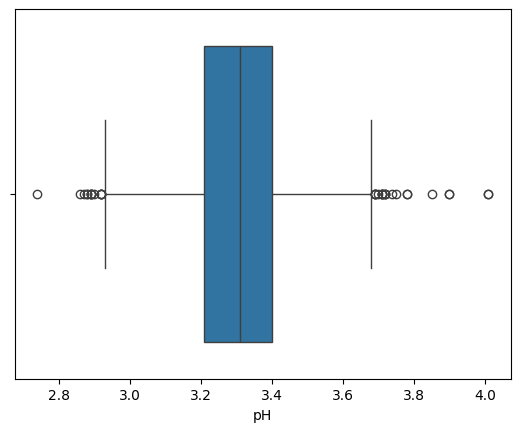

In [19]:
# 'pH' column 상자 그림 그리기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='pH')

plt.show()

#### 4-3. 'pH' column의 IQR을 구하고 상한과 하한을 계산하세요.

In [21]:
df['pH']

0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
1594    3.45
1595    3.52
1596    3.42
1597    3.57
1598    3.39
Name: pH, Length: 1599, dtype: float64

In [108]:
# 'pH' column의 IQR, 상한, 하한 계산하여 변수에 저장
Q1 = df['pH'].quantile(0.25)
Q3 = df['pH'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# 'pH' column의 IQR, 상한, 하한 출력
custom_upper_limit = 3.4500000000000006

lower_bound = Q1 - 1.5 * IQR

print("pH IQR:", IQR)
print("pH Upper Limit:", custom_upper_limit)
print("pH lower limit:", lower_bound)

pH IQR: 0.18999999999999995
pH Upper Limit: 3.4500000000000006
pH lower limit: 2.925


#### 4-4. 'pH' column의 극단치를 상한값 또는 하한값으로 대체하세요.

In [109]:
# 'pH' column의 하한 극단치를 하한값으로 변경
upper_outliers = df[df['pH'] > custom_upper_limit]

# 'pH' column의 상한 극단치를 하한값으로 변경
lower_outliers = df[df['pH'] < lower_bound]

df['pH'] = df['pH'].apply(lambda x: lower_bound if x < lower_bound or x > custom_upper_limit else x)


# 상한, 하한 극단값 개수 확인
num_upper_outliers = len(upper_outliers)
num_lower_outliers = len(lower_outliers)
print("상한 극단값 개수: ", num_upper_outliers)
print("하한 극단값 개수: ", num_lower_outliers)


상한 극단값 개수:  254
하한 극단값 개수:  14


In [24]:
# 'pH' column의 IQR, 상한, 하한 계산하여 변수에 저장
iqr_ph = df['pH'].quantile(0.75) - df['pH'].quantile(0.25)
ph_up_lim = df['pH'].quantile(0.75) + 1.5 * iqr_ph
ph_lo_lim = df['pH'].quantile(0.25) - 1.5 * iqr_ph
# 'pH' column의 IQR, 상한, 하한 출력
print("pH IQR: ", iqr_ph)
print("pH upper limit: ", ph_up_lim)
print("pH lower limit: ", ph_lo_lim)

pH IQR:  0.18999999999999995
pH upper limit:  3.6849999999999996
pH lower limit:  2.925


In [23]:
# 'pH' column의 하한 극단치를 하한값으로 변경
df['pH'] = np.where((df['pH'] < ph_lo_lim), ph_lo_lim, df['pH'])
# 'pH' column의 상한 극단치를 상한값으로 변경
df['pH'] = np.where((df['pH'] > ph_up_lim), ph_up_lim, df['pH'])
# 상한, 하한값 개수 확인
print("상한값 개수: ", (df['pH'] == ph_up_lim).sum())
print("하한값 개수: ", (df['pH'] == ph_lo_lim).sum())

상한값 개수:  254
하한값 개수:  14


####